# 計算複雑性の比較

In [1]:
#import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. VSTF vs DBP[5]

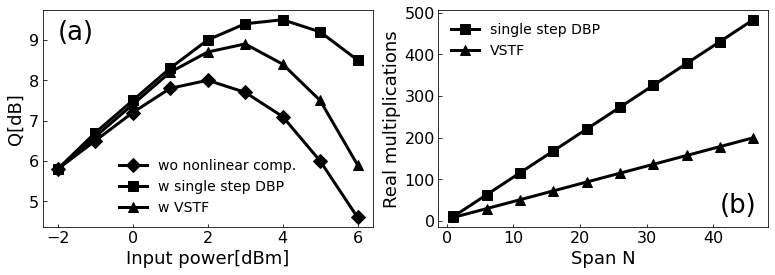

In [83]:
P = np.arange(-2, 7)
wo_nonlinear_comp = np.array([5.8, 6.5, 7.2, 7.8, 8.0, 7.7, 7.1, 6.0, 4.6])
w_single_step_DBP = np.array([5.8, 6.7, 7.5, 8.3, 9.0, 9.4, 9.5, 9.2, 8.5])
w_VSTF = np.array([5.8, 6.6, 7.4, 8.2, 8.7, 8.9, 8.4, 7.5, 5.9])

L = 1
N = np.arange(1, 51, 5)

dbp = 4 * N * L * np.log2(L) + 10.5 * N * L
vstf = 2 * N * L * np.log2(L) + 4.25 * N * L + 4 * L * np.log2(L) + 4 * L


fig = plt.figure(figsize=(13, 4))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(P, wo_nonlinear_comp, '-D', markersize=10, lw=3, color='black', label='wo nonlinear comp.')
ax0.plot(P, w_single_step_DBP, '-s', markersize=10, lw=3, color='black', label='w single step DBP')
ax0.plot(P, w_VSTF, '-^', markersize=10, lw=3, color='black', label='w VSTF')
ax0.text(-2, 9, '(a)', color='black', fontsize=26)
ax0.legend(fontsize=14, loc='lower center', frameon=False)
ax0.set_xlabel('Input power[dBm]', fontsize=18)
ax0.set_ylabel('Q[dB]', fontsize=18)
ax0.xaxis.set_tick_params(labelsize= 16, direction='in')
ax0.yaxis.set_tick_params(labelsize= 16, direction='in')

ax1.plot(N, dbp, '-s', markersize=10, lw=3, color='black', label='single step DBP')
ax1.plot(N, vstf, '-^', markersize=10, lw=3, color='black', label='VSTF')
ax1.text(41, 20, '(b)', color='black', fontsize=26)
ax1.legend(fontsize=14, loc='upper left', frameon=False)
ax1.set_xlabel('Span N', fontsize=18)
ax1.set_ylabel('Real multiplications', fontsize=18)
ax1.xaxis.set_tick_params(labelsize= 16, direction='in')
ax1.yaxis.set_tick_params(labelsize= 16, direction='in');

# 2. ANN vs DBP

3200
260.60339807279115
[  20   40   60   80  100  120  140  160  180  200  220  240  260  280
  300  320  340  360  380  400  420  440  460  480  500  520  540  560
  580  600  620  640  660  680  700  720  740  760  780  800  820  840
  860  880  900  920  940  960  980 1000 1020 1040 1060 1080 1100 1120
 1140 1160 1180 1200 1220 1240 1260 1280 1300 1320 1340 1360 1380 1400
 1420 1440 1460 1480 1500 1520 1540 1560 1580 1600 1620 1640 1660 1680
 1700 1720 1740 1760 1780 1800 1820 1840 1860 1880 1900 1920 1940 1960
 1980 2000]
[  122.30169904   244.60339807   366.90509711   489.20679615
   611.50849518   733.81019422   856.11189325   978.41359229
  1100.71529133  1223.01699036  1345.3186894   1467.62038844
  1589.92208747  1712.22378651  1834.52548555  1956.82718458
  2079.12888362  2201.43058266  2323.73228169  2446.03398073
  2568.33567976  2690.6373788   2812.93907784  2935.24077687
  3057.54247591  3179.84417495  3302.14587398  3424.44757302
  3546.74927206  3669.05097109  3791.352

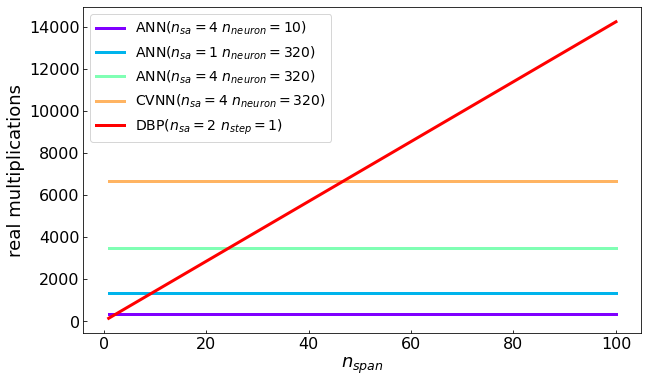

In [86]:
span = np.arange(1, 101)
nsy = 10000

s = 1
nsa = 1
neuron = 320
ann_nsa1_neuron320 = ((2 * nsa * s * neuron + neuron * 2) * nsy + 4 * nsa * nsy * np.log2(nsa * nsy) + 4 * nsa * nsy) / nsy * np.ones_like(span)
nsa = 4
neuron = 10
ann_nsa4_neuron10 = ((2 * nsa * s * neuron + neuron * 2) * nsy + 4 * nsa * nsy * np.log2(nsa * nsy) + 4 * nsa * nsy) / nsy * np.ones_like(span)
neuron = 320
ann_nsa4_neuron320 = ((2 * nsa * s * neuron + neuron * 2) * nsy + 4 * nsa * nsy * np.log2(nsa * nsy) + 4 * nsa * nsy) / nsy * np.ones_like(span)
print(2 * nsa * s * neuron + neuron * 2)
print(4 * nsa * np.log2(nsa * nsy) + 4 * nsa)

cvnn_nsa4_neuron320 = ((4 * nsa * s * neuron + neuron * 4) * nsy + 4 * nsa * nsy * np.log2(nsa * nsy) + 4 * nsa * nsy) / nsy * np.ones_like(span)

nsa = 2
step = 1
dbp = (10 * span * step * nsa * nsy + span * step * (4 * nsa * nsy * np.log2(nsa * nsy) + 4 * nsa * nsy)) / nsy
print(10 * span * step * nsa)
print(span * step * (4 * nsa * np.log2(nsa * nsy) + 4 * nsa))

vstf = (2 * span * nsa * nsy * np.log2(nsa * nsy) + 4.25 * span * L * nsa * nsy) / nsy

cm = plt.get_cmap('rainbow', 5)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(span, ann_nsa4_neuron10, lw=3, color=[cm(0)[0], cm(0)[1], cm(0)[2]], label='ANN($n_{sa}=4$ $n_{neuron}=10$)')
ax.plot(span, ann_nsa1_neuron320, lw=3, color=[cm(1)[0], cm(1)[1], cm(1)[2]], label='ANN($n_{sa}=1$ $n_{neuron}=320$)')
ax.plot(span, ann_nsa4_neuron320, lw=3, color=[cm(2)[0], cm(2)[1], cm(2)[2]], label='ANN($n_{sa}=4$ $n_{neuron}=320$)')
ax.plot(span, cvnn_nsa4_neuron320, lw=3, color=[cm(3)[0], cm(3)[1], cm(3)[2]], label='CVNN($n_{sa}=4$ $n_{neuron}=320$)')
ax.plot(span, dbp, lw=3, color=[cm(4)[0], cm(4)[1], cm(4)[2]], label='DBP($n_{sa}=2$ $n_{step}=1$)')
#ax.plot(span, vstf, label='VSTF')
plt.legend(fontsize=14, loc='upper left')
plt.xlabel('$n_{span}$', fontsize=18)
plt.ylabel('real multiplications', fontsize=18)
ax.xaxis.set_tick_params(labelsize= 16, direction='in')
ax.yaxis.set_tick_params(labelsize= 16, direction='in');

In [59]:
print(dbp)
print(cvnn_nsa4_neuron320[0]) #47
print(ann_nsa4_neuron320[0])  #25
print(ann_nsa1_neuron320[0])  #10
print(ann_nsa4_neuron10[0])  #3

[  142.30169904   284.60339807   426.90509711   569.20679615
   711.50849518   853.81019422   996.11189325  1138.41359229
  1280.71529133  1423.01699036  1565.3186894   1707.62038844
  1849.92208747  1992.22378651  2134.52548555  2276.82718458
  2419.12888362  2561.43058266  2703.73228169  2846.03398073
  2988.33567976  3130.6373788   3272.93907784  3415.24077687
  3557.54247591  3699.84417495  3842.14587398  3984.44757302
  4126.74927206  4269.05097109  4411.35267013  4553.65436916
  4695.9560682   4838.25776724  4980.55946627  5122.86116531
  5265.16286435  5407.46456338  5549.76626242  5692.06796146
  5834.36966049  5976.67135953  6118.97305857  6261.2747576
  6403.57645664  6545.87815567  6688.17985471  6830.48155375
  6972.78325278  7115.08495182  7257.38665086  7399.68834989
  7541.99004893  7684.29174797  7826.593447    7968.89514604
  8111.19684507  8253.49854411  8395.80024315  8538.10194218
  8680.40364122  8822.70534026  8965.00703929  9107.30873833
  9249.61043737  9391.912